# Analysing Political Executives with AI

## Using AutoGluon to processing the data


```shell
# Link for how to install autogluon on Windows system
# https://auto.gluon.ai/stable/index.html
# For other operation systems, please also check this link for latest news. 

# test automl model
# install autogluon
!pip3 install -U pip
!pip3 install -U setuptools wheel

# CPU version of pytorch has smaller footprint - see installation instructions in
# pytorch documentation - https://pytorch.org/get-started/locally/
!pip3 install torch==1.10.1+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

!pip3 install autogluon
```

In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split #splitting the dataset
import numpy as np

# Showing all the details of results
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
# Reading the data file
train_data = TabularDataset('data_AutoGluon.csv')

In [3]:
type(train_data)

train_data.columns

train_data.head()

train_data.describe()

autogluon.core.dataset.TabularDataset

Index(['ccode', 'leader', 'entry', 'exit', 'exitcode', 'prevtimesinoffice',
       'posttenurefate', 'gender', 'yrborn', 'yrdied', 'numentry', 'numexit',
       'yrbegin', 'yrend', 'pop_x', 'begin_gdppc', 'pop_y', 'age', 'tenure',
       'growth_rate', 'fties_range', 'growth_rate_normgroup',
       'growth_rate_avggrp'],
      dtype='object')

,ccode,leader,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,...,yrend,pop_x,begin_gdppc,pop_y,age,tenure,growth_rate,fties_range,growth_rate_normgroup,growth_rate_avggrp
0,0.0,Grant,0.0,0.0,0.285714,0.0,0.625,0.5,0.069364,0.954122,...,0.007194,0.034455,0.029689,0.029199,0.434783,0.142921,0.003934,1.0,4,5
1,0.0,Hayes,0.0,0.0,0.285714,0.0,0.625,0.5,0.069364,0.956989,...,0.035971,0.037693,0.030700,0.035105,0.550725,0.061228,0.059757,1.0,4,4
2,0.0,Arthur,0.0,0.0,0.285714,0.0,0.625,0.5,0.109827,0.954480,...,0.064748,0.041457,0.038625,0.038392,0.507246,0.050101,0.004888,1.0,4,5
3,0.0,Cleveland,0.0,0.0,0.285714,0.0,0.625,0.5,0.156069,0.962366,...,0.093525,0.045222,0.039319,0.042213,0.449275,0.061228,0.010956,1.0,4,5
4,0.0,Harrison,0.0,0.0,0.285714,0.0,0.625,0.5,0.132948,0.959857,...,0.122302,0.049044,0.041150,0.046034,0.565217,0.061228,0.004793,1.0,4,5


,ccode,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,numentry,...,yrend,pop_x,begin_gdppc,pop_y,age,tenure,growth_rate,fties_range,growth_rate_normgroup,growth_rate_avggrp
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,...,922.000000,902.000000,922.000000,899.000000,922.000000,922.000000,922.000000,922.0,922.000000,922.000000
mean,0.390935,0.079718,0.151302,0.372017,0.062093,0.496475,0.511388,0.553885,0.652212,0.079718,...,0.643300,0.031253,0.052354,0.029527,0.541718,0.086704,0.020790,1.0,3.924078,4.815618
std,0.289082,0.197406,0.283199,0.214789,0.146002,0.263134,0.074636,0.224373,0.463421,0.197406,...,0.277630,0.097848,0.069842,0.091977,0.151286,0.111121,0.047728,0.0,0.504793,0.500440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.320763,1.0,1.000000,1.000000
25%,0.158025,0.000000,0.000000,0.285714,0.000000,0.250000,0.500000,0.381503,0.000000,0.000000,...,0.424460,0.002552,0.012873,0.002473,0.434783,0.021276,0.003340,1.0,4.000000,5.000000
50%,0.374074,0.000000,0.000000,0.285714,0.000000,0.625000,0.500000,0.595376,0.970968,0.000000,...,0.690647,0.006850,0.028166,0.006395,0.536232,0.061088,0.019832,1.0,4.000000,5.000000
75%,0.553086,0.000000,0.166667,0.285714,0.000000,0.625000,0.500000,0.734104,0.987097,0.000000,...,0.884892,0.026059,0.061935,0.024348,0.637681,0.102047,0.039507,1.0,4.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.532870,1.0,7.000000,7.000000


In [4]:
# delete other irrelevant columns
del train_data['growth_rate_normgroup']
# del train_data['growth_rate_avggrp']
del train_data['growth_rate']
train_data.columns

# change label into growth_rate
# id, label = 'leader', 'growth_rate'

# change label into growth_rate_normgroup
# id, label = 'leader', 'growth_rate_normgroup'

# change label into growth_rate group
id, label = 'leader', 'growth_rate_avggrp'
df_train = train_data

Index(['ccode', 'leader', 'entry', 'exit', 'exitcode', 'prevtimesinoffice',
       'posttenurefate', 'gender', 'yrborn', 'yrdied', 'numentry', 'numexit',
       'yrbegin', 'yrend', 'pop_x', 'begin_gdppc', 'pop_y', 'age', 'tenure',
       'fties_range', 'growth_rate_avggrp'],
      dtype='object')

In [5]:
df_train.dtypes

ccode                 float64
leader                 object
entry                 float64
exit                  float64
exitcode              float64
prevtimesinoffice     float64
posttenurefate        float64
gender                float64
yrborn                float64
yrdied                float64
numentry              float64
numexit               float64
yrbegin               float64
yrend                 float64
pop_x                 float64
begin_gdppc           float64
pop_y                 float64
age                   float64
tenure                float64
fties_range           float64
growth_rate_avggrp      int64
dtype: object

In [6]:
#split train data and test data
# df_train, df_test=train_test_split(train_data, test_size=0.33, random_state=1)
# df_train.shape, df_test.shape

In [7]:
predictor = TabularPredictor(label=label).fit(
    df_train.drop(columns=[id, 'leader']))

No path specified. Models will be saved in: "AutogluonModels/ag-20220502_082101\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220502_082101\"
AutoGluon Version:  0.4.0
Python Version:     3.9.7
Operating System:   Windows
Train Data Rows:    922
Train Data Columns: 19
Label Column: growth_rate_avggrp
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	7 unique label values:  [5, 4, 6, 3, 7, 1, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classes with at least 10 examples that will be kept for training models: 0.9869848156182213
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Me

In [8]:
predictor.leaderboard(df_train.drop(columns=[id, 'leader']), silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.947939,0.802198,0.080998,0.044998,0.486002,0.080998,0.044998,0.486002,1,True,6
1,WeightedEnsemble_L2,0.947939,0.802198,0.088998,0.044998,0.747029,0.008000,0.000000,0.261026,2,True,14
2,RandomForestEntr,0.947939,0.802198,0.089002,0.051999,0.406001,0.089002,0.051999,0.406001,1,True,7
3,ExtraTreesEntr,0.945770,0.791209,0.088999,0.050999,0.385002,0.088999,0.050999,0.385002,1,True,10
4,ExtraTreesGini,0.944685,0.785714,0.083997,0.050998,0.393002,0.083997,0.050998,0.393002,1,True,9
5,LightGBMLarge,0.938178,0.796703,0.009001,0.004000,1.518998,0.009001,0.004000,1.518998,1,True,13
6,KNeighborsDist,0.937093,0.747253,0.023000,0.011002,0.005996,0.023000,0.011002,0.005996,1,True,2
7,XGBoost,0.830803,0.791209,0.008002,0.006974,0.835021,0.008002,0.006974,0.835021,1,True,11
8,LightGBM,0.811280,0.796703,0.003997,0.005000,0.684000,0.003997,0.005000,0.684000,1,True,5
9,CatBoost,0.806941,0.802198,0.003000,0.001002,1.673000,0.003000,0.001002,1.673000,1,True,8


In [9]:
predictor.feature_importance(df_train, subsample_size=None)

These features in provided data are not utilized by the predictor and will be ignored: ['leader', 'fties_range']
Computing feature importance via permutation shuffling for 18 features using 910 rows with 3 shuffle sets...
	5.47s	= Expected runtime (1.82s per shuffle set)
	0.56s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
begin_gdppc,0.053846,0.004790,0.001314,3,0.081293,0.026399
ccode,0.036630,0.005193,0.003317,3,0.066388,0.006872
yrborn,0.028205,0.006052,0.007502,3,0.062885,-0.006475
pop_x,0.025641,0.004160,0.004331,3,0.049480,0.001802
tenure,0.024542,0.004160,0.004722,3,0.048382,0.000703
yrdied,0.022711,0.003859,0.004744,3,0.044824,0.000597
yrbegin,0.021612,0.002288,0.001857,3,0.034720,0.008504
yrend,0.020513,0.003532,0.004871,3,0.040754,0.000271
age,0.016484,0.002198,0.002937,3,0.029077,0.003890
pop_y,0.013187,0.003297,0.010102,3,0.032077,-0.005704


In [10]:
# predictor.evaluate(df_test.drop(columns=[id, 'leader']))

Text(0, 0.5, 'Importance')

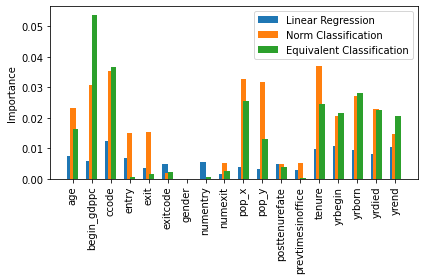

In [12]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

labels = ['age', 'begin_gdppc', 'ccode', 'entry', 'exit', 'exitcode', 'gender', 'numentry',
'numexit', 'pop_x', 'pop_y', 'posttenurefate', 'prevtimesinoffice', 'tenure', 'yrbegin', 
'yrborn', 'yrdied', 'yrend']
Linear_Regression = ['0.007565', '0.005877', '0.012403', '0.006895', '0.003671', '0.004737', '0.000005', '0.005501', '0.001576', '0.00377', '0.003155', '0.004747', '0.002821', '0.009953', '0.010795', '0.009525', '0.008158', '0.010314']
Norm_Classification = ['0.023179', '0.030905', '0.03532', '0.015085', '0.015453', '0.00184', '0', '0', '0.005151', '0.032745', '0.031641', '0.004783', '0.005151', '0.03716', '0.020603', '0.027226', '0.022811', '0.014717']
Equivalent_Classification = ['0.016484', '0.053846', '0.03663', '0.000733', '0.001465', '0.002198', '0', '0.000733', '0.002564', '0.025641', '0.013187', '0.004029', '0.000366', '0.024542', '0.021612', '0.028205', '0.022711', '0.020513']


x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, np.double(Linear_Regression), width, label='Linear Regression')
rects2 = ax.bar(x, np.double(Norm_Classification), width, label='Norm Classification')
rects2 = ax.bar(x + width/2, np.double(Equivalent_Classification), width, label='Equivalent Classification')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Importance')
# ax.set_title('Importance')
ax.set_xticks(x, labels, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()